# Q2: High Dimensional Gaussians

## Distance of Gaussian samples from origin

if we have $x = [x_1, x_2, ..., x_d]^T$ then:<br/>

$$\text{Euclidean dist.} = \text{Euclidean distance} = \sqrt{\sum_{i=1}^{d}(x_i - 0) ^2)} = \sqrt{\sum_{i=1}^{d}x_i ^2} = x^Tx$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi

## Distribution of distances of Gaussian samples from origin

In [10]:
def norm(x):
    return x.dot(x) ** 0.5

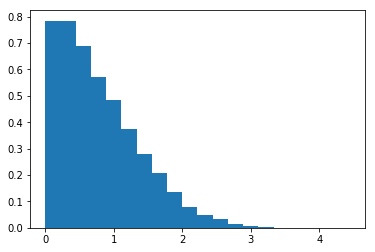

In [183]:
V = np.random.randn(10000, 1)
dists = [norm(x) for x in V]
plt.hist(dists, density=True, bins=20)
plt.show()

**Does this confirm your intuition that the samples will be near the origin?**

As seen above, The first bin is higher than the others which is completely congruent with my intuition that most of the samples should be close to 0 (as the pdf is larger for them samples and they are more probable to be drawn). 

## Plot samples from distribution of distances

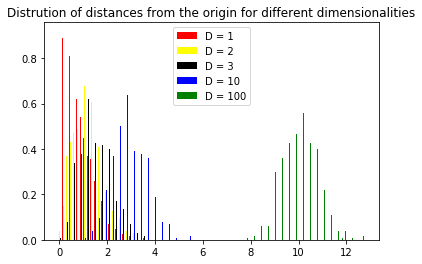

In [207]:
V = [np.random.randn(10000, d) for d in [1, 2, 3, 10, 100]]

dists = np.array([[norm(x) for x in v] for v in V])

colors = ['red', 'yellow', 'black', 'blue', 'green']

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.title('Distrution of distances from the origin for different dimensionalities')
plt.legend()
plt.show()

**As the dimensionality of the Gaussian increases, what can you say about the expected distance of the samples from the Gaussian's mean (in this case, origin)?**

The expected distance from origin increases as d increseas.

## Plot samples from distribution of distances

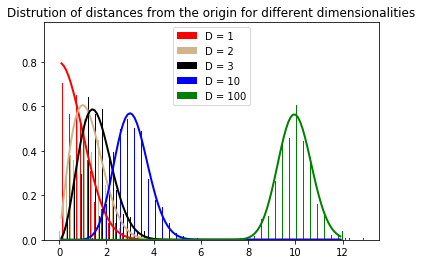

In [205]:
import scipy.stats as stats

V = [np.random.randn(10000, d) for d in [1, 2, 3, 10, 100]]

dists = np.array([[norm(x) for x in v] for v in V])

colors = ['red', 'tan', 'black', 'blue', 'green']

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.title('Distrution of distances from the origin for different dimensionalities')
plt.legend()

x = np.arange(0.1, 12, 0.1)
plt.plot(x, stats.chi.pdf(x, df=1), color='red', lw=2)
plt.plot(x, stats.chi.pdf(x, df=2), color='tan', lw=2)
plt.plot(x, stats.chi.pdf(x, df=3), color='black', lw=2)
plt.plot(x, stats.chi.pdf(x, df=10), color='blue', lw=2)
plt.plot(x, stats.chi.pdf(x, df=100), color='green', lw=2)

stats.chi2.pdf(x, df=3)

plt.show()

## Distribution of distance between samples

**Taking two samples from the $D$-dimensional unit Gaussian, $x_a, x_b \sim \mathcal{N}(0_D, I_D)$ how is $x_a -  x_b$ distributed?**

One can easily prove that if $X1$ and $X2$ are two independent Gaussian RVs, with means $\mu_1$ and $\mu_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, then $X+Y$ is another Gaussian random variable with mean $\mu_1 + \mu_2$ and variance $\sigma^2=\sigma_1^2 + \sigma_2^2$ (This is a well known theorem and we can prove it using various methods, such as the characteristic or the moment generating function. For a more complete list of proofs you can visit [this wikipedia page](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables)).

We can write $x_a - x_b$ as $x_a + (-x_b)$ where $x_a$ and $-x_b$ are distributed according to $\mathcal{N}(0_D, I_D)$. Therefore, sum of them would be a Gaussian random variable with the distribution $\mathcal{N}(0_D, \sqrt{2}I_D)$.


**Using the above result about $\chi$-distribution, derive how $\vert \vert x _a -  x _b\vert \vert_2$ is distributed.**

We know that Y=$x_a - x_b$ is a Gaussian RV where its different dimensions are iid. Therefore, based on what we know from previous parts, the following RV would be a Chi RV:
$$Z=\sqrt{\sum_{i=1}^{D} (\frac{Y_i - 0}{\sqrt{2}})^2 } = \sqrt{\sum_{i=1}^{D} \frac{Y_i}{2}^2 } = \frac{1}{\sqrt{2}} \sqrt{\sum_{i=1}^{D}Y_i^2}$$

Also, $T = \vert \vert Y \vert \vert_2 = \sqrt{\sum_{i=1}^{D}Y_i^2} = \sqrt{2}Z$. We can compute the pdf of T using change of variables formula easily:

$$f(T=t)=f(\sqrt{2}Z=t)=f(Z=\frac{t}{\sqrt{2}};D) = \frac{1}{2^{k/2-1}\Gamma(k/2)} (\frac{t}{\sqrt{2}})^{D-1} \exp(-t^2/4)$$

In [202]:
D = [1, 2, 3, 10, 100]

sample_1 = [np.random.randn(1000, d) for d in D]
sample_2 = [np.random.randn(1000, d) for d in D]

dists = np.array([[norm(x1 - x2) for x1, x2 in zip(s1, s2)] 
                  for s1, s2 in zip(sample_1, sample_2)])

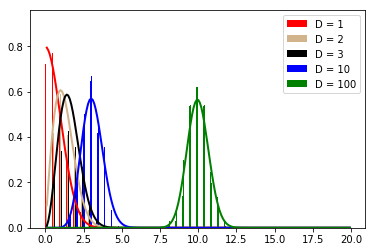

In [209]:
colors = ['red', 'tan', 'black', 'blue', 'green']

x = np.arange(0.1, 20, 0.1)

for i, d in enumerate(D):
    plt.plot(x, stats.chi.pdf(x, df=d), color=colors[i], lw=2)

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.legend()
plt.show()

## Linear and Polar Interpolation Between Samples

In [5]:
from math import pi

In [6]:
lin_interp = lambda alpha, x_a, x_b: alpha * x_a + (1 - alpha) * x_b
polar_interp = lambda alpha, x_a, x_b: alpha**0.5 * x_a + (1 - alpha)**0.5 * x_b


def ll_norm_stable(x):
    """
    stable log likelihood implementation of unit Gaussian distribution...
    """
    d = x.shape[0]
    
    return d * (-0.5 * np.log(2 * pi)) - 1/2 * np.sum(x ** 2)

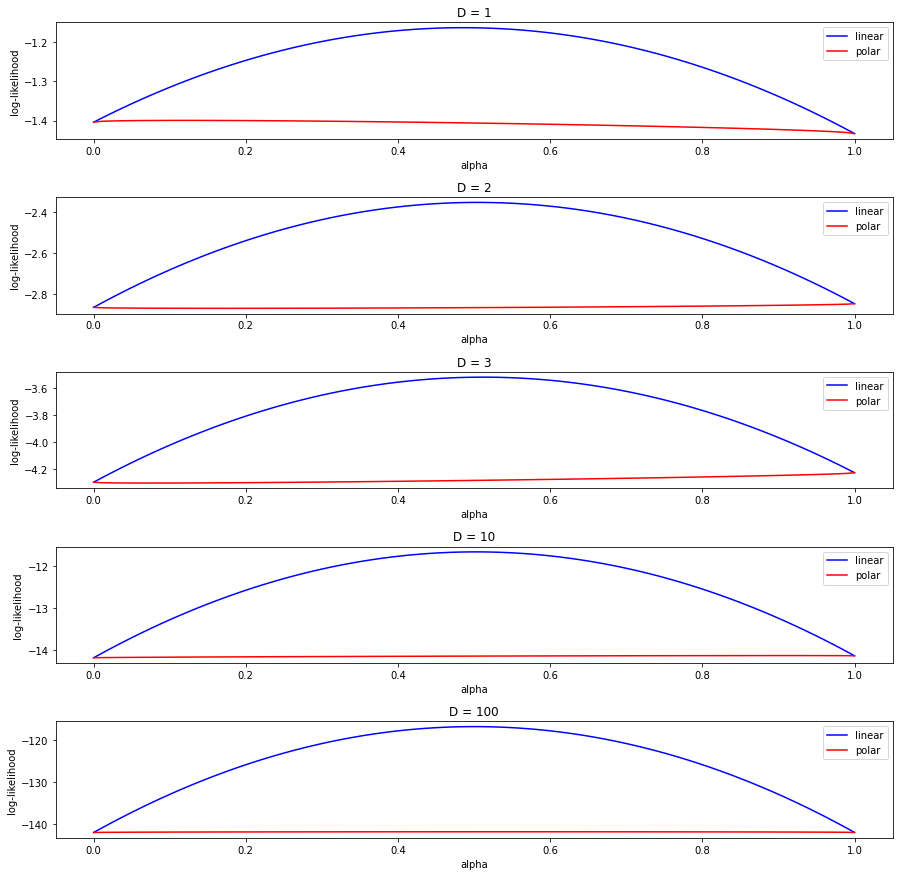

In [8]:
D = [1, 2, 3, 10, 100]

fig, axs = plt.subplots(5, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i, d in enumerate(D):
    sample_1 = np.random.randn(1000, d)
    sample_2 = np.random.randn(1000, d)

    avg_ll_linear = np.zeros(101, dtype=np.float64)
    avg_ll_polar = np.zeros(101, dtype=np.float64)

    for j, alpha in enumerate(np.linspace(0, 1, num=101)):
        avg_ll_linear[j] = np.mean([ll_norm_stable(lin_interp(alpha, x1, x2)) 
                                    for x1, x2 in zip(sample_1, sample_2)])
        avg_ll_polar[j] = np.mean([ll_norm_stable(polar_interp(alpha, x1, x2)) 
                                    for x1, x2 in zip(sample_1, sample_2)])
            
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_linear, color='b', label='linear')
    axs[i].set_title(f'D = {d}')
    axs[i].set_xlabel('alpha')
    axs[i].set_ylabel('log-likelihood')
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_polar, color='r', label='polar')
    axs[i].legend()

**Is a higher log-likelihood for the interpolated points necessarily better? Given this, is it a good idea to linearly interpolate between samples from a high dimensional Gaussian?**<br/>

I do not think that higher likelihood implies betterness. Higher likelihood just shows that interpolated points on average are closer to the origin than the original sample points. In fact, the interpolated points are coming from another Gaussian distribution with the variance less than one ($a^2 + (1-a)^2 < (a + 1-a)^2 = 1$). Therefore they tend to be closer to the origin and have higher probabilities of begin drawn from the unit Gaussian distribution. In fact, one could sample arbitrary points from a Gaussian distribution with the variance close to zero and get much larger likelihood values from them. But again, this does not again imply that these points are better. They are just closer to the origin.

But I think for comparison we need a context. If, as mentioned in the forum of the course, we are going to use these interpolated points as inputs to a generative model, coming from the same distribution as the training data matters.

As the number of dimension increases, the difference between likelihoods of original sample points and interpolated points get bigger, which migt imply that the change in the geometry of these interpolated points gets more severe. Again in particular, if we are going to feed these points to a generative model, it might be better to stick to the same distribution.

**Comment on the log-likelihood under the unit Gaussian of points along the polar interpolation. Give an intuitive explanation for why polar interpolation is more suitable than linear interpolation for high dimensional Gaussians.**

As seen in the plots, the log-likelihood of the interpolated points is approximately equal to the log-likelihood of original sample points. This is due to the fact that the polar interpolated points come from the same distribution which is unit Gaussian (Their mean is zero and the variance is $\sqrt{a}^2 + \sqrt{1-a}^2$ = 1).

As the dimension increases, the difference between the log-likelihood of linearly interploated points and the original points increases which makes them more different in terms of where they are located in the N-dimensional space. If we are going to feed these as inputs to a generative model, this can be problematic. Because the model has not been trained on the points coming from a different distribution.

## Norm along interpolation

In [15]:
from scipy.stats import chi

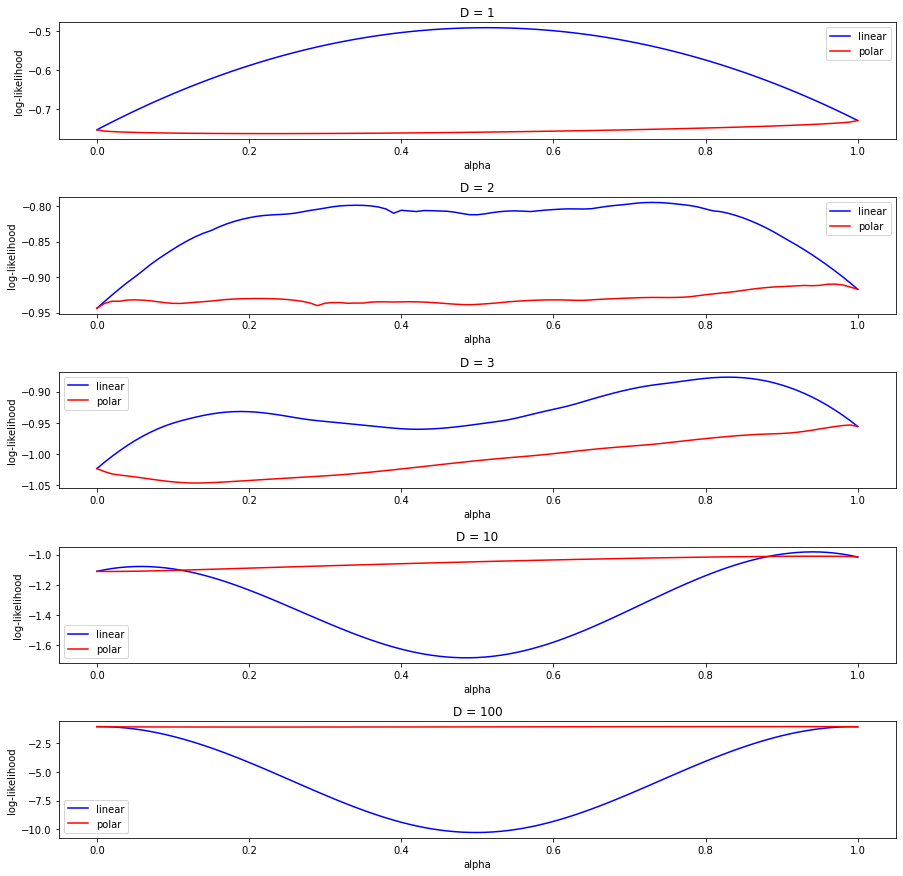

In [16]:
D = [1, 2, 3, 10, 100]

fig, axs = plt.subplots(5, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i, d in enumerate(D):
    sample_1 = np.random.randn(1000, d)
    sample_2 = np.random.randn(1000, d)

    avg_ll_norm = np.zeros(101, dtype=np.float64)

    for j, alpha in enumerate(np.linspace(0, 1, num=101)):

        norm_linear = [norm(lin_interp(alpha, x1, x2)) 
                       for x1, x2 in zip(sample_1, sample_2)]
        norm_polar = [norm(polar_interp(alpha, x1, x2)) 
                      for x1, x2 in zip(sample_1, sample_2)]
        
        avg_ll_linear[j] = np.mean([chi.logpdf(x, df=d) for x in norm_linear])
        avg_ll_polar[j] = np.mean([chi.logpdf(x, df=d) for x in norm_polar])
    
    axs[i].set_title(f'D = {d}')
    axs[i].set_xlabel('alpha')
    axs[i].set_ylabel('log-likelihood')
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_linear, color='b', label='linear')
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_polar, color='r', label='polar')
    axs[i].legend()

**How does the log-likelihood along the linear interpolation compare to the log-likelihood of the true samples (endpoints)?**

In lower dimensionalities, it is bigger but in higher dimensionalities it is smaller. This can imply that the linearly interpolated points falls in an area where the probability of drawing a point is lower under the chi distribution. In fact, if we are going to again feed these interpolated points to a generative model, it could cause problems as the model might not be trained well on these samples with low probabilities.